In [1]:
periodo_de_estudio = ['2019-01-01','2022-09-30']

from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
from scipy import stats

import seaborn as sns

import plotly.io as pio
pio.renderers.default = "notebook_connected"

warnings.filterwarnings('ignore')
# Read the data

data = pd.read_csv('/Users/juancarlosgonzalez/Library/CloudStorage/OneDrive-CELSIAS.AE.S.P/Desktop/Digitalización/Argos/Argos_AB_total.csv', sep = ';').replace(',', '.', regex = True)
data.index = pd.to_datetime(data['datetime'])
data.drop(['datetime','Año','Delivery Point'], axis = 1, inplace = True)
data = data.astype(float)
data.reset_index(inplace = True)

data = data.loc[(data['datetime'] > periodo_de_estudio[0]) & (data['datetime'] <= periodo_de_estudio[1])]
data.index = data['datetime']
data.drop(['datetime'], axis = 1, inplace = True)

In [2]:
data_horaria = data.resample('H').mean()




data_diaria = data_horaria.resample('D').sum()
data_diaria['Consumo (MWh)'] = data_horaria.resample('D').sum()/1000
data_diaria.drop(['VALUE'], axis = 1, inplace = True)

data_mensual = data_diaria.resample('M').sum()
data_mensual['Consumo (GWh)'] = data_diaria.resample('M').sum()/1000
data_mensual.drop(['Consumo (MWh)'], axis = 1, inplace = True)

data_diaria['month'] = data_diaria.index.month
data_diaria['day'] = data_diaria.index.day
data_diaria['weekday'] = data_diaria.index.weekday
data_diaria['week'] = data_diaria.index.week
data_diaria['year'] = data_diaria.index.year

data_mensual['month'] = data_mensual.index.month
data_mensual['year'] = data_mensual.index.year

data_horaria['hour']=data_horaria.index.hour
data_horaria['year']=data_horaria.index.year

# Argos consumption

## Monthly consumption

In [3]:
data_mensual_LB = data_mensual.loc[data_mensual['Consumo (GWh)'].between(data_mensual['Consumo (GWh)'].quantile(.05),data_mensual['Consumo (GWh)'].quantile(.95))]['Consumo (GWh)'].mean()


fig = px.bar(data_mensual,x= data_mensual.index ,y="Consumo (GWh)")
fig.add_hline(y=data_mensual_LB, annotation_text=" Tipical month", annotation_position="top right")
fig.update_layout( title='Tipical monthly consumption (GWh) - Argos', width=800, height=600, colorway=['#fc7703', '#757371'], yaxis_title="Consumo (GWh)")
fig.show()

In [12]:
data_mensual_LB = data_mensual.loc[data_mensual['Consumo (GWh)'].between(data_mensual['Consumo (GWh)'].quantile(.05),data_mensual['Consumo (GWh)'].quantile(.95))]['Consumo (GWh)'].mean()

fig = px.box(data_mensual,y="Consumo (GWh)", color="year")
fig.add_hline(y=data_mensual_LB, annotation_text=" Tipical day", annotation_position="top right")
fig.update_layout( title='Tipical monthly consumption (GWh) by year - Argos', width=800, height=600, colorway=['#fc7703', '#757371'], yaxis_title="Consumo (GWh)")
fig.show()

In [4]:
print('Monthly Cosumption (GWh) statistics: ')


print('Median: ', data_mensual['Consumo (GWh)'].median())

data_mensual['Consumo (GWh)'].describe()


Monthly Cosumption (GWh) statistics: 
Median:  14.45964696


count    45.000000
mean     13.755751
std       2.980454
min       4.617291
25%      12.446438
50%      14.459647
75%      15.493214
max      17.109714
Name: Consumo (GWh), dtype: float64

## Daily consumption

In [5]:
data_diaria_LB = data_diaria.loc[data_diaria['Consumo (MWh)'].between(data_diaria['Consumo (MWh)'].quantile(.05),data_diaria['Consumo (MWh)'].quantile(.95))]['Consumo (MWh)'].mean()

fig = px.box(data_diaria,y="Consumo (MWh)", color="year")
fig.add_hline(y=data_diaria_LB, annotation_text=" Tipical day", annotation_position="top right")
fig.update_layout( title='Tipical daily consumption (MWh) by year - Argos', width=800, height=600, colorway=['#fc7703', '#757371'], yaxis_title="Consumo (MWh)")
fig.show()

In [6]:
data_diaria_LB = data_diaria.loc[data_diaria['Consumo (MWh)'].between(data_diaria['Consumo (MWh)'].quantile(.05),data_diaria['Consumo (MWh)'].quantile(.95))]['Consumo (MWh)'].mean()

fig = px.box(data_diaria, y="Consumo (MWh)", color="month")
fig.add_hline(y=data_diaria_LB, annotation_text=" Tipical day", annotation_position="top right")
fig.update_layout( title='Tipical daily consumption (MWh) by month - Argos', width=800, height=600, colorway=['#fc7703', '#757371'], yaxis_title="Consumo (MWh)")
fig.show()

In [7]:
print('Daily Cosumption (MWh) statistics: ')


print('Median: ', data_diaria['Consumo (MWh)'].median())

data_diaria['Consumo (MWh)'].describe()


Daily Cosumption (MWh) statistics: 
Median:  496.51168


count    1369.000000
mean      452.161273
std       188.295264
min         0.000000
25%       356.430000
50%       496.511680
75%       601.918000
max       681.130160
Name: Consumo (MWh), dtype: float64

## Tipical load

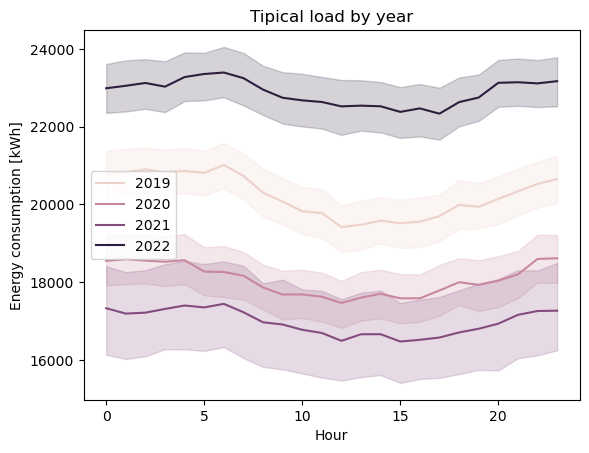

In [8]:
sns.lineplot(
    x='hour',
    y='VALUE',
    hue='year',
    data=data_horaria, 
    ci=95,
    estimator=np.mean,
    # palette="flare",

)
plt.title("Tipical load by year")
plt.xlabel('Hour')
plt.ylabel('Energy consumption [kWh]')
plt.legend()
plt.show()


In [9]:
print('Hourly Cosumption (KWh) statistics: ')


print('Median: ', data_horaria['VALUE'].median())

data_horaria['VALUE'].describe()

Hourly Cosumption (KWh) statistics: 
Median:  20944.440000000002


count    32182.000000
mean     19234.627514
std       7799.644889
min          0.000000
25%      14923.160000
50%      20944.440000
75%      25973.500000
max      29680.240000
Name: VALUE, dtype: float64